# Import Library

In [1]:
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import nltk
import stopwords
from stopwords import get_stopwords

# Data Loading

In [2]:
data = pd.read_csv('text.csv')
data.drop_duplicates(inplace=True)
data.drop(columns='Unnamed: 0', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


In [3]:
error = data.groupby('text').filter(lambda x: x['label'].nunique() > 1)
error.head()

,text,label
0,i just feel really helpless and heavy hearted,4
8,im forever taking some time out to have a lie ...,5
28,when,3
34,i was less intelligent and could not really fe...,2
56,i went from feeling like i knew what i was doi...,0


In [4]:
error.query('text == "i just feel really helpless and heavy hearted"')

,text,label
0,i just feel really helpless and heavy hearted,4
330710,i just feel really helpless and heavy hearted,0


In [5]:
data.drop(error.index,inplace=True)
data.groupby('text').filter(lambda x: x['label'].nunique() > 1)

,text,label


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372159 entries, 1 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    372159 non-null  object
 1   label   372159 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.5+ MB


# EDA

In [7]:
eda = data.copy()
eda['label'] = eda['label'].map({
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
})

### See The Variation of Target

<Axes: ylabel='count'>

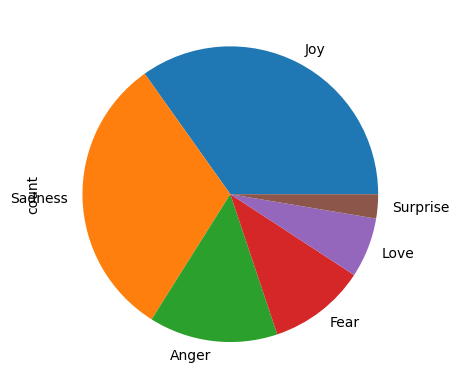

In [8]:
eda['label'].value_counts().plot(kind='pie',y='label')


# 

### See Length of Suprise Classification

In [9]:
len(eda.query('label == "Surprise"'))

9839

### See Length of Joy Classification

In [10]:
len(eda.query('label == "Joy"'))

129645

### See Sample of Each Classification

In [11]:
for i in eda['label'].unique():
    print('='*10,i,'='*10)
    print(eda.query('label == "%s"'%i)['text'].head(1))

========== Sadness ==========
1    ive enjoyed being able to slouch about relax a...
Name: text, dtype: object
========== Fear ==========
2    i gave up my internship with the dmrg and am f...
Name: text, dtype: object
========== Love ==========
6    i would think that whomever would be lucky eno...
Name: text, dtype: object
========== Joy ==========
7    i fear that they won t ever feel that deliciou...
Name: text, dtype: object
========== Anger ==========
13    i feel like a jerk because the library student...
Name: text, dtype: object
========== Surprise ==========
116    i really love reading bible because i can feel...
Name: text, dtype: object


# Model Definition

In [13]:
def simple_model(input_shape):
    keras.backend.clear_session()
    keras.utils.set_random_seed(42)
    
    model = keras.Sequential([
        keras.layers.Embedding(10000, 16),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(6, activation='softmax')
    ])

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    model.summary()
    return model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
X = eda['text']
y = eda['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


NameError: name 'train_test_split' is not defined